# Simulating Knee Time Series

Expected exponent of the simulation:
- Should always be 2 for single exponential (at the limit)
    - Depends  on the tau's for how quick it reaches this limit (quicker for faster Tau's)
- Should always be 4 for double exponential (at the limit)
    - Is some room for moving between 2 and 4, but not clear how (not an analytic solution)

Expected knee of the simulation:
- The frequency of the knee is `f_k = (2 * pi * T_d)^2` (for single exponential)
    - Note: what FOOOF returns is `k`, where `f_k = k^2`
    
Solution for knee (single exponential):
- Tau_d = 1/2*pi * sqrt(1/k)
- (2*pi*Tau)^2 = 1/k
- k = 4 * pi^2 * Tau^2
- k = 2 * pi * tau

Where:
- f_k = k^2 

In [1]:
import numpy as np

from neurodsp import sim
from neurodsp.spectral import compute_spectrum
from fooof import FOOOF

In [2]:
n_seconds = 10
fs = 1000

In [3]:
tau_r, tau_d = 0., 0.01  # Default values

#tau_r, tau_d = 0., 0.01
#tau_r, tau_d = 0., 0.05
#tau_r, tau_d = 0.1, 0.1
#tau_r, tau_d = 0.01, 0.02

In [4]:
# Solve for k
k_val = 1 / (2 * np.pi * tau_d)
print('K   : \t {:1.4f}'.format(k_val))

# Solve for f_k
f_k = k_val**2
print('f_k : \t {:1.4f}'.format(f_k))

K   : 	 15.9155
f_k : 	 253.3030


In [5]:
sig = sim.sim_synaptic_current(n_seconds, fs, tau_r=tau_r, tau_d=tau_d)

In [6]:
fm = FOOOF(max_n_peaks=0, aperiodic_mode='knee', verbose=False)

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 2 - 250 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     0.6761, 105.7441, 1.8392                                     
                                                                                                  
                                       0 peaks were found:                                        
          

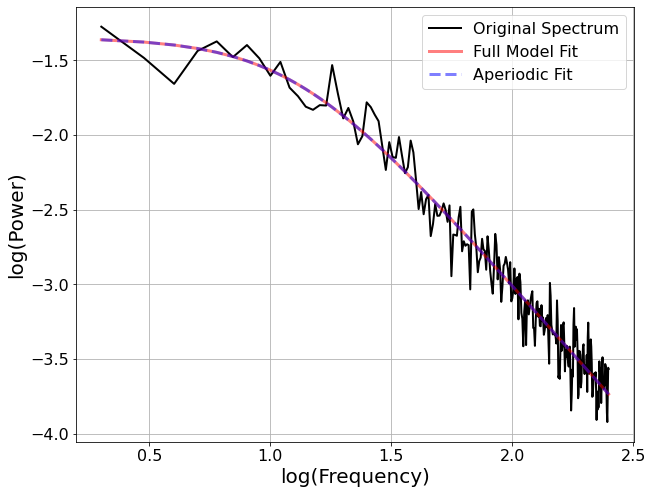

In [7]:
fm.report(*compute_spectrum(sig, fs, nperseg=1000), [2, 250], plt_log=True)